In [7]:
import encoder
import pandas as pd
import time
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
data = pd.read_csv('blogtext.csv')
data.head()

,id,gender,age,topic,sign,date,text
0,2059027,male,15,Student,Leo,"14,May,2004","Info has been found (+/- 100 pages,..."
1,2059027,male,15,Student,Leo,"13,May,2004",These are the team members: Drewe...
2,2059027,male,15,Student,Leo,"12,May,2004",In het kader van kernfusie op aarde...
3,2059027,male,15,Student,Leo,"12,May,2004",testing!!! testing!!!
4,3581210,male,33,InvestmentBanking,Aquarius,"11,June,2004",Thanks to Yahoo!'s Toolbar I can ...


In [9]:
data['text'][0:3]

0               Info has been found (+/- 100 pages,...
1               These are the team members:   Drewe...
2               In het kader van kernfusie op aarde...
Name: text, dtype: object

In [10]:
import re
import unicodedata

def strip_accents(text):
    """
    Strip accents from input String.

    :param text: The input string.
    :type text: String.

    :returns: The processed String.
    :rtype: String.
    """
    try:
        text = unicode(text, 'utf-8')
    except (TypeError, NameError): # unicode is a default on python 3 
        pass
    text = unicodedata.normalize('NFD', text)
    text = text.encode('ascii', 'ignore')
    text = text.decode("utf-8")
    return str(text)

In [16]:
start = time.time()

enc = caesar.CaesarEncoder()
source = list(data['text'][0:10000])
processed_source = []
for text in source:
    text = re.sub(r'[!@#$(),"%^*?:;~`0-9.\'\-&/=><{}+\\|_ ]', '', text)
    text = re.sub(r'[\[\]]', '', text)
    text = strip_accents(text)
    # converting the text to lower case
    text = text.lower()
    # appending to data_list
    processed_source.append(text)

target = []
rotations = []
for text in processed_source:
    enc.randomize()
    enc.text = text
    target.append(enc.encoded_text) 
    rotations.append(enc.rotation)
    
time.time()-start

20.316195011138916

In [19]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(rotations)

In [17]:
from sklearn.model_selection import train_test_split
target_train, target_test, y_train, y_test = train_test_split(target, y, test_size = 0.20)

In [18]:
for x in target_train:
    temp = re.sub(r'[abcdefghijklmnopqrstuvwxyz]','',x)
    if len(temp)>0:
        print(temp)
        break
print('done')

done


In [20]:
target_train[0]

'lkdgvrphuhdoobjuhdwqhzvwrgdbkhbhyhubrqhlmxvwirxqgrxwwkdwldpjrlqjwrjudgxdwhirxuwklqpbfodvviurpwkhplqqhvrwddfdghpbrislpsduwvdqgvflhqfhvzklwhehduodnhwrzqvklsfdpsxvhvwkhuhduhpbjudghvslpskdqgvwurqjwrtxlwhvwurqjprqhbjhwwlqdoorilwzklfklvdewulfnhgrxwvxeduxdwkhgxecsxwphryhuwkhwrsvxfndvvdlglwfrxogqwehgrqhdqgpbvklwlvkbgudolfwrrdwwluheslpsvwuroodslpsohdqdehdwfksurqxqfldwlrqfdwwhqgdqfhsrruzklfklvdqdwlpholqhvvtxlwhsrruzklfklvdqdwkhjudgxdwlrqfhuhprqblvdwwkhudlqerzirrgvrqodnhvwuhhwzkhuhlzdvsursrvlwlrqhgdjdlqodvwqljkwrqvdwxugdbdwdplkrshbrxdoofdqpdnhlw'

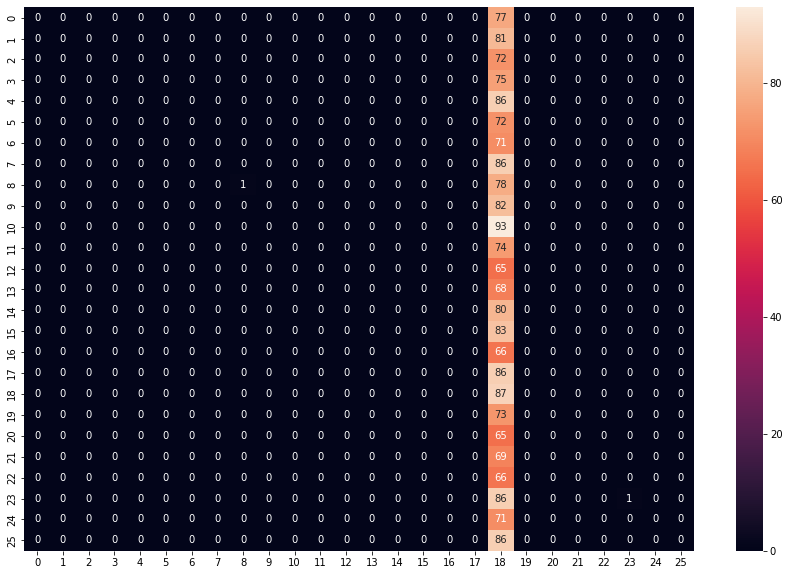

In [100]:
plt.figure(figsize=(15,10))
sns.heatmap(cm, annot = True)
plt.show()